<a href="https://colab.research.google.com/github/BrendaLoznik/waterpumps/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 Housekeeping

### 1.1 Load libraries

In [2]:
#basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 200)

### 1.2 Custom functions

In [120]:
#custom function that creates a numerical data quality report
def numerical_dqr(df):
  
  #select numerical columns
  numerical = df.select_dtypes(include = ['int', 'Int64', 'float']).columns.tolist()
  
  #data type
  data_types = pd.DataFrame(
    df[numerical].dtypes,
    columns=['Data Type'])
  
  #missing data
  missing_data = pd.DataFrame(
    df[numerical].isnull().sum(),
    columns=['Missing Values'])
  
  #unique values
  unique_values = pd.DataFrame(
    columns=['Unique Values'])
  for row in list(df[numerical].columns.values):
    unique_values.loc[row] = [df[numerical][row].nunique()]
    
    #number of records
  count_values = pd.DataFrame(
    columns=['Records'])
  for row in list(df[numerical].columns.values):
      count_values.loc[row] = [df[numerical][row].count()]
    
    #minimum value
  maximum_values = pd.DataFrame(
    columns=['Maximum Value'])
  for row in list(df[numerical].columns.values):
      maximum_values.loc[row] = [df[numerical][row].max()]
    
  #maximum value
  minimum_values = pd.DataFrame(
    columns=['Minimum Value'])
  for row in list(df[numerical].columns.values):
      minimum_values.loc[row] = [df[numerical][row].min()]
    
  #mean value
  mean_values = pd.DataFrame(
    columns=['Mean Value'])
  for row in list(df[numerical].columns.values):
      mean_values.loc[row] = [df[numerical][row].mean()]
    
  #first quartile
  quartile_1 = pd.DataFrame(
    columns=['1st Quartile'])
  for row in list(df[numerical].columns.values):
      quartile_1.loc[row] = [df[numerical][row].quantile(0.25)]
    
  #median
  median = pd.DataFrame(
  columns=['Median'])
  for row in list(df[numerical].columns.values):
    median.loc[row] = [df[numerical][row].quantile(0.5)]
    
  #third quartile
  quartile_3 = pd.DataFrame(
    columns=['3rd Quartile'])
  for row in list(df[numerical].columns.values):
    quartile_3.loc[row] = [df[numerical][row].quantile(0.75)]
    
  #join columns 
  dq_report_num = data_types.join(count_values).join(missing_data).join(unique_values).join(minimum_values).join(maximum_values).join(mean_values).join(quartile_1).join(median).join(quartile_3)
  
  #percentage missing
  dq_report_num['Missing %'] = (dq_report_num['Missing Values'] / len(df[numerical]) *100)
  
  # change order of columns
  dq_report_num = dq_report_num[['Data Type', 'Records', 'Unique Values', 'Missing Values', 'Missing %', 'Mean Value', 'Minimum Value', '1st Quartile', 'Median', '3rd Quartile', 'Maximum Value', ]]

  #round
  dq_report_num[['Missing %', 'Mean Value', 'Minimum Value', '1st Quartile', 'Median', '3rd Quartile', 'Maximum Value']] =   dq_report_num[['Missing %', 'Mean Value', 'Minimum Value', '1st Quartile', 'Median', '3rd Quartile', 'Maximum Value']].round(1)
  
   
  #rreturn report
  return(dq_report_num)

In [137]:
def categorical_dqr(df):

  #select categorical columns
  categorical = df.select_dtypes(include = 'object').columns.tolist()

  #datatype
  data_types = pd.DataFrame(
    df[categorical].dtypes,
    columns=['Data Type'])
  
  #count
  count_values = pd.DataFrame(
      columns=['Records'])
  for row in list(raw[categorical].columns.values):
    count_values.loc[row] = [raw[categorical][row].count()]
  
   #missing data
  missing_data = pd.DataFrame(
    df[categorical].isnull().sum(),
    columns=['Missing Values'])
  
  #unique values
  unique_values = pd.DataFrame(
      columns=['Unique Values'])
  for row in list(raw[categorical].columns.values):
    unique_values.loc[row] = [raw[categorical][row].nunique()]

  #mode
  mode_values = pd.DataFrame(
      columns=['Mode'])
  for row in list(raw[categorical].columns.values): 
    mode_values.loc[row] = [raw[categorical][row].mode()[0]]
    mode = mode_values.loc[row]
  
  #mode frequency
  listModeFreq = []
  for row in categorical:
    mode = raw[row].mode().iat[0]
    ModeFreq = raw[row].value_counts()[mode]
    #print(x, mode, raw[x].value_counts()[mode])
    listModeFreq .append(ModeFreq )
  listModeFreq  = np.array(listModeFreq )
    
  
   #create data quality report
  dq_report_cat = data_types.join(missing_data).join(count_values).join(unique_values).join(mode_values)
  dq_report_cat['Mode freq.'] = listModeFreq 
  dq_report_cat['Mode %'] = (dq_report_cat['Mode freq.'] / dq_report_cat['Records']*100) .astype('float')
  dq_report_cat['Missing %'] = (dq_report_cat['Missing Values'] / len(raw[categorical]) *100)

  #change order of columns
  dq_report_cat = dq_report_cat[['Data Type', 'Records', 'Unique Values', 'Missing Values', 'Missing %', 'Mode', 'Mode freq.', 'Mode %']]
  dq_report_cat[['Missing %', 'Mode %']] =   dq_report_cat[['Missing %'	,  'Mode %']].round(1  )

  #return report
  return(dq_report_cat)

In [184]:
#custom function that creates a numerical data quality report
def datetime_dqr(df):
  
  #select numerical columns
  date = df.select_dtypes(include = ['datetime64[ns]']).columns.tolist()
  
  #data type
  data_types = pd.DataFrame(
    df[date].dtypes,
    columns=['Data Type'])
  
  #missing data
  missing_data = pd.DataFrame(
    df[date].isnull().sum(),
    columns=['Missing Values'])
  
  #unique values
  unique_values = pd.DataFrame(
    columns=['Unique Values'])
  for row in list(df[date].columns.values):
    unique_values.loc[row] = [df[date][row].nunique()]
    
    #number of records
  count_values = pd.DataFrame(
    columns=['Records'])
  for row in list(df[date].columns.values):
      count_values.loc[row] = [df[date][row].count()]
    
    #minimum value
  maximum_values = pd.DataFrame(
    columns=['Maximum Value'])
  for row in list(df[date].columns.values):
      maximum_values.loc[row] = [df[date][row].max()]
    
  #maximum value
  minimum_values = pd.DataFrame(
    columns=['Minimum Value'])
  for row in list(df[date].columns.values):
      minimum_values.loc[row] = [df[date][row].min()]
    
  #mean value
  mean_values = pd.DataFrame(
    columns=['Mean Value'])
  for row in list(df[date].columns.values):
      mean_values.loc[row] = [df[date][row].mean()]
    
  #first quartile
  quartile_1 = pd.DataFrame(
    columns=['1st Quartile'])
  for row in list(df[date].columns.values):
      quartile_1.loc[row] = [df[date][row].quantile(0.25)]
    
  #median
  median = pd.DataFrame(
  columns=['Median'])
  for row in list(df[date].columns.values):
    median.loc[row] = [df[date][row].quantile(0.5)]
    
  #third quartile
  quartile_3 = pd.DataFrame(
    columns=['3rd Quartile'])
  for row in list(df[date].columns.values):
    quartile_3.loc[row] = [df[date][row].quantile(0.75)]
    
  #join columns 
  dq_report_date = data_types.join(count_values).join(missing_data).join(unique_values).join(minimum_values).join(maximum_values).join(mean_values).join(quartile_1).join(median).join(quartile_3)
  
  #percentage missing
  dq_report_date['Missing %'] = (dq_report_date['Missing Values'] / len(df[date]) *100)
  
  # change order of columns
  dq_report_date = dq_report_date[['Data Type', 'Records', 'Unique Values', 'Missing Values', 'Missing %', 'Mean Value', 'Minimum Value', '1st Quartile', 'Median', '3rd Quartile', 'Maximum Value', ]]
   
  #round   
  dq_report_date['Mean Value'] = dq_report_date['Mean Value'].dt.date
  dq_report_date['Missing %'] = dq_report_date['Missing %'].round(1)

    
  #rreturn report
  return(dq_report_date)

In [7]:
#custome duplicate checker
def duplicate_checker(df):
  duplicates = df.duplicated(keep = 'first').sum()
  print("Number of duplicates: {}".format(duplicates))
  print("Total number of records: {}".format(len(df)))
  print("Percentage duplicated: {}".format((duplicates/len(df))*100))

In [22]:
def kdeplotter (dataset, feature, rows, columns):
  fig, axes = plt.subplots(nrows=rows,ncols=columns, figsize = (30,12))
  plot = 0
  for i in range(rows):
    for j in range(columns):
       ax = sns.kdeplot(data = dataset, x =feature[plot] , ax = axes[i][j],    shade = True, color  = "black" )
       plot +=1

In [207]:
def countplotter (dataset, feature, rows, columns):
    fig, axes = plt.subplots(nrows=rows,ncols=columns, figsize = (30,50))
    plot = 0
    for i in range(rows):
        for j in range(columns):
             ax = sns.countplot(data = dataset, x =feature[plot] , ax = axes[i][j], palette='Set2' )
             ax.set_title(feature[plot])
             ax.set_xlabel("")
             ax.set_xticklabels(ax.get_xticklabels(), rotation = 70, fontsize=9)
             plot +=1

In [10]:
def distribution_checker (data, xlabel):
  grouped = data.groupby([xlabel, 'status_group'])['id'].count().reset_index()
  pivot = grouped.pivot_table(index = xlabel, columns = 'status_group', fill_value = 0).reset_index()
  mi=pivot.columns
  mi.tolist()
  ind = pd.Index([ str(e[1])  for e in mi.tolist()])
  pivot.columns = ind
  pivot['total_pumps'] = pivot['functional'] +pivot['functional needs repair'] +pivot['non functional']
  pivot['perc_functional'] = ((pivot['functional']/pivot['total_pumps'])*100).round(1)
  pivot['perc_non_functional'] = ((pivot['non functional']/pivot['total_pumps'])*100).round(1)
  pivot['perc_functional_needs_repair'] = ((pivot['functional needs repair']/pivot['total_pumps'])*100).round(1)
  pivot = pivot.drop(['functional', 'functional needs repair', 'non functional'], axis=1)
  return(pivot)

### 1.3 Load data

In [11]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [13]:
#import data
train_labels = pd.read_csv('/content/gdrive/MyDrive/Kaggle/Waterpump-github/train_labels.csv')
train_values = pd.read_csv('/content/gdrive/MyDrive/Kaggle/Waterpump-github/train_values.csv', parse_dates = ['date_recorded' ])
test_values = pd.read_csv('/content/gdrive/MyDrive/Kaggle/Waterpump-github/test_values.csv', parse_dates = ['date_recorded' ])

#merge train values and train labels to single dataset
train= pd.merge(train_labels , train_values, on='id')


In [14]:
#concatenate train and test for data visualization
raw = pd.concat([train, test_values])
raw.head()

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,functional,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,functional,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,functional,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,non functional,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,functional,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


# 2 EDA - overview

### 2.1 Duplicates

In [18]:
#Good news! There are no duplicate recoreds in the dataset.
duplicate_checker(raw)

Number of duplicates: 0
Total number of records: 74250
Percentage duplicated: 0.0


### 2.2 Numerical data

In [167]:
#plot a numerical data quality report
numerical_dqr = numerical_dqr(raw)
numerical_dqr

,Data Type,Records,Unique Values,Missing Values,Missing %,Mean Value,Minimum Value,1st Quartile,Median,3rd Quartile,Maximum Value
amount_tsh,float64,74250,102,0,0.0,318.7,0.0,0.0,0.0,20.0,350000.0
gps_height,int64,74250,2456,0,0.0,665.7,-90.0,0.0,364.0,1317.0,2777.0
longitude,float64,74250,71870,0,0.0,34.1,0.0,33.1,34.9,37.2,40.3
latitude,float64,74250,71869,0,0.0,-5.7,-11.6,-8.5,-5.0,-3.3,-0.0
population,int64,74250,1128,0,0.0,180.8,0.0,0.0,25.0,215.0,30500.0
construction_year,int64,74250,55,0,0.0,1298.5,0.0,0.0,1986.0,2004.0,2013.0


A data quality report provides a great overview of the dataset. It imediately shows us some things we should look out for:
* There are no missing values, but a longitude of zero does not exists in Tanzania. This makes me wonder if missing values are expressed as zero's.
* Some features like *region_code* and *district_code* might actually be categorical features.
* *Amount_tsh* and *num_private* appear to contain a lot of zero's.
* *Population* and *gps_height* appear to contain some outliers.

In [160]:
#convert faulty datatypes
raw[['region_code','district_code', 'num_private', 'id']] = raw[['region_code','district_code', 'num_private', 'id']].astype('object')

### 2.3 Categorical data

In [219]:
categorical_dqr = categorical_dqr(raw)
categorical_dqr 

,Data Type,Records,Unique Values,Missing Values,Missing %,Mode,Mode freq.,Mode %
id,object,74250,74250,0,0.0,0,1,0.0
status_group,object,59400,3,14850,20.0,functional,32259,54.3
funder,object,69746,2140,4504,6.1,Government Of Tanzania,11299,16.2
installer,object,69718,2410,4532,6.1,DWE,21751,31.2
wpt_name,object,74250,45684,0,0.0,none,4440,6.0
num_private,object,74250,68,0,0.0,0,73299,98.7
basin,object,74250,9,0,0.0,Lake Victoria,12871,17.3
subvillage,object,73780,21425,470,0.6,Shuleni,646,0.9
region,object,74250,21,0,0.0,Iringa,6599,8.9
region_code,object,74250,27,0,0.0,11,6608,8.9


The categorical data quality report again provides us with some important insights
* *installer*, *funder*, *wpt_name*, *subvillage* and a few other features have very high cardinality. *num_private* also contains very little variation.
* *recorded_by* consists of a single value and therefore contains no information
* Several features have missing values


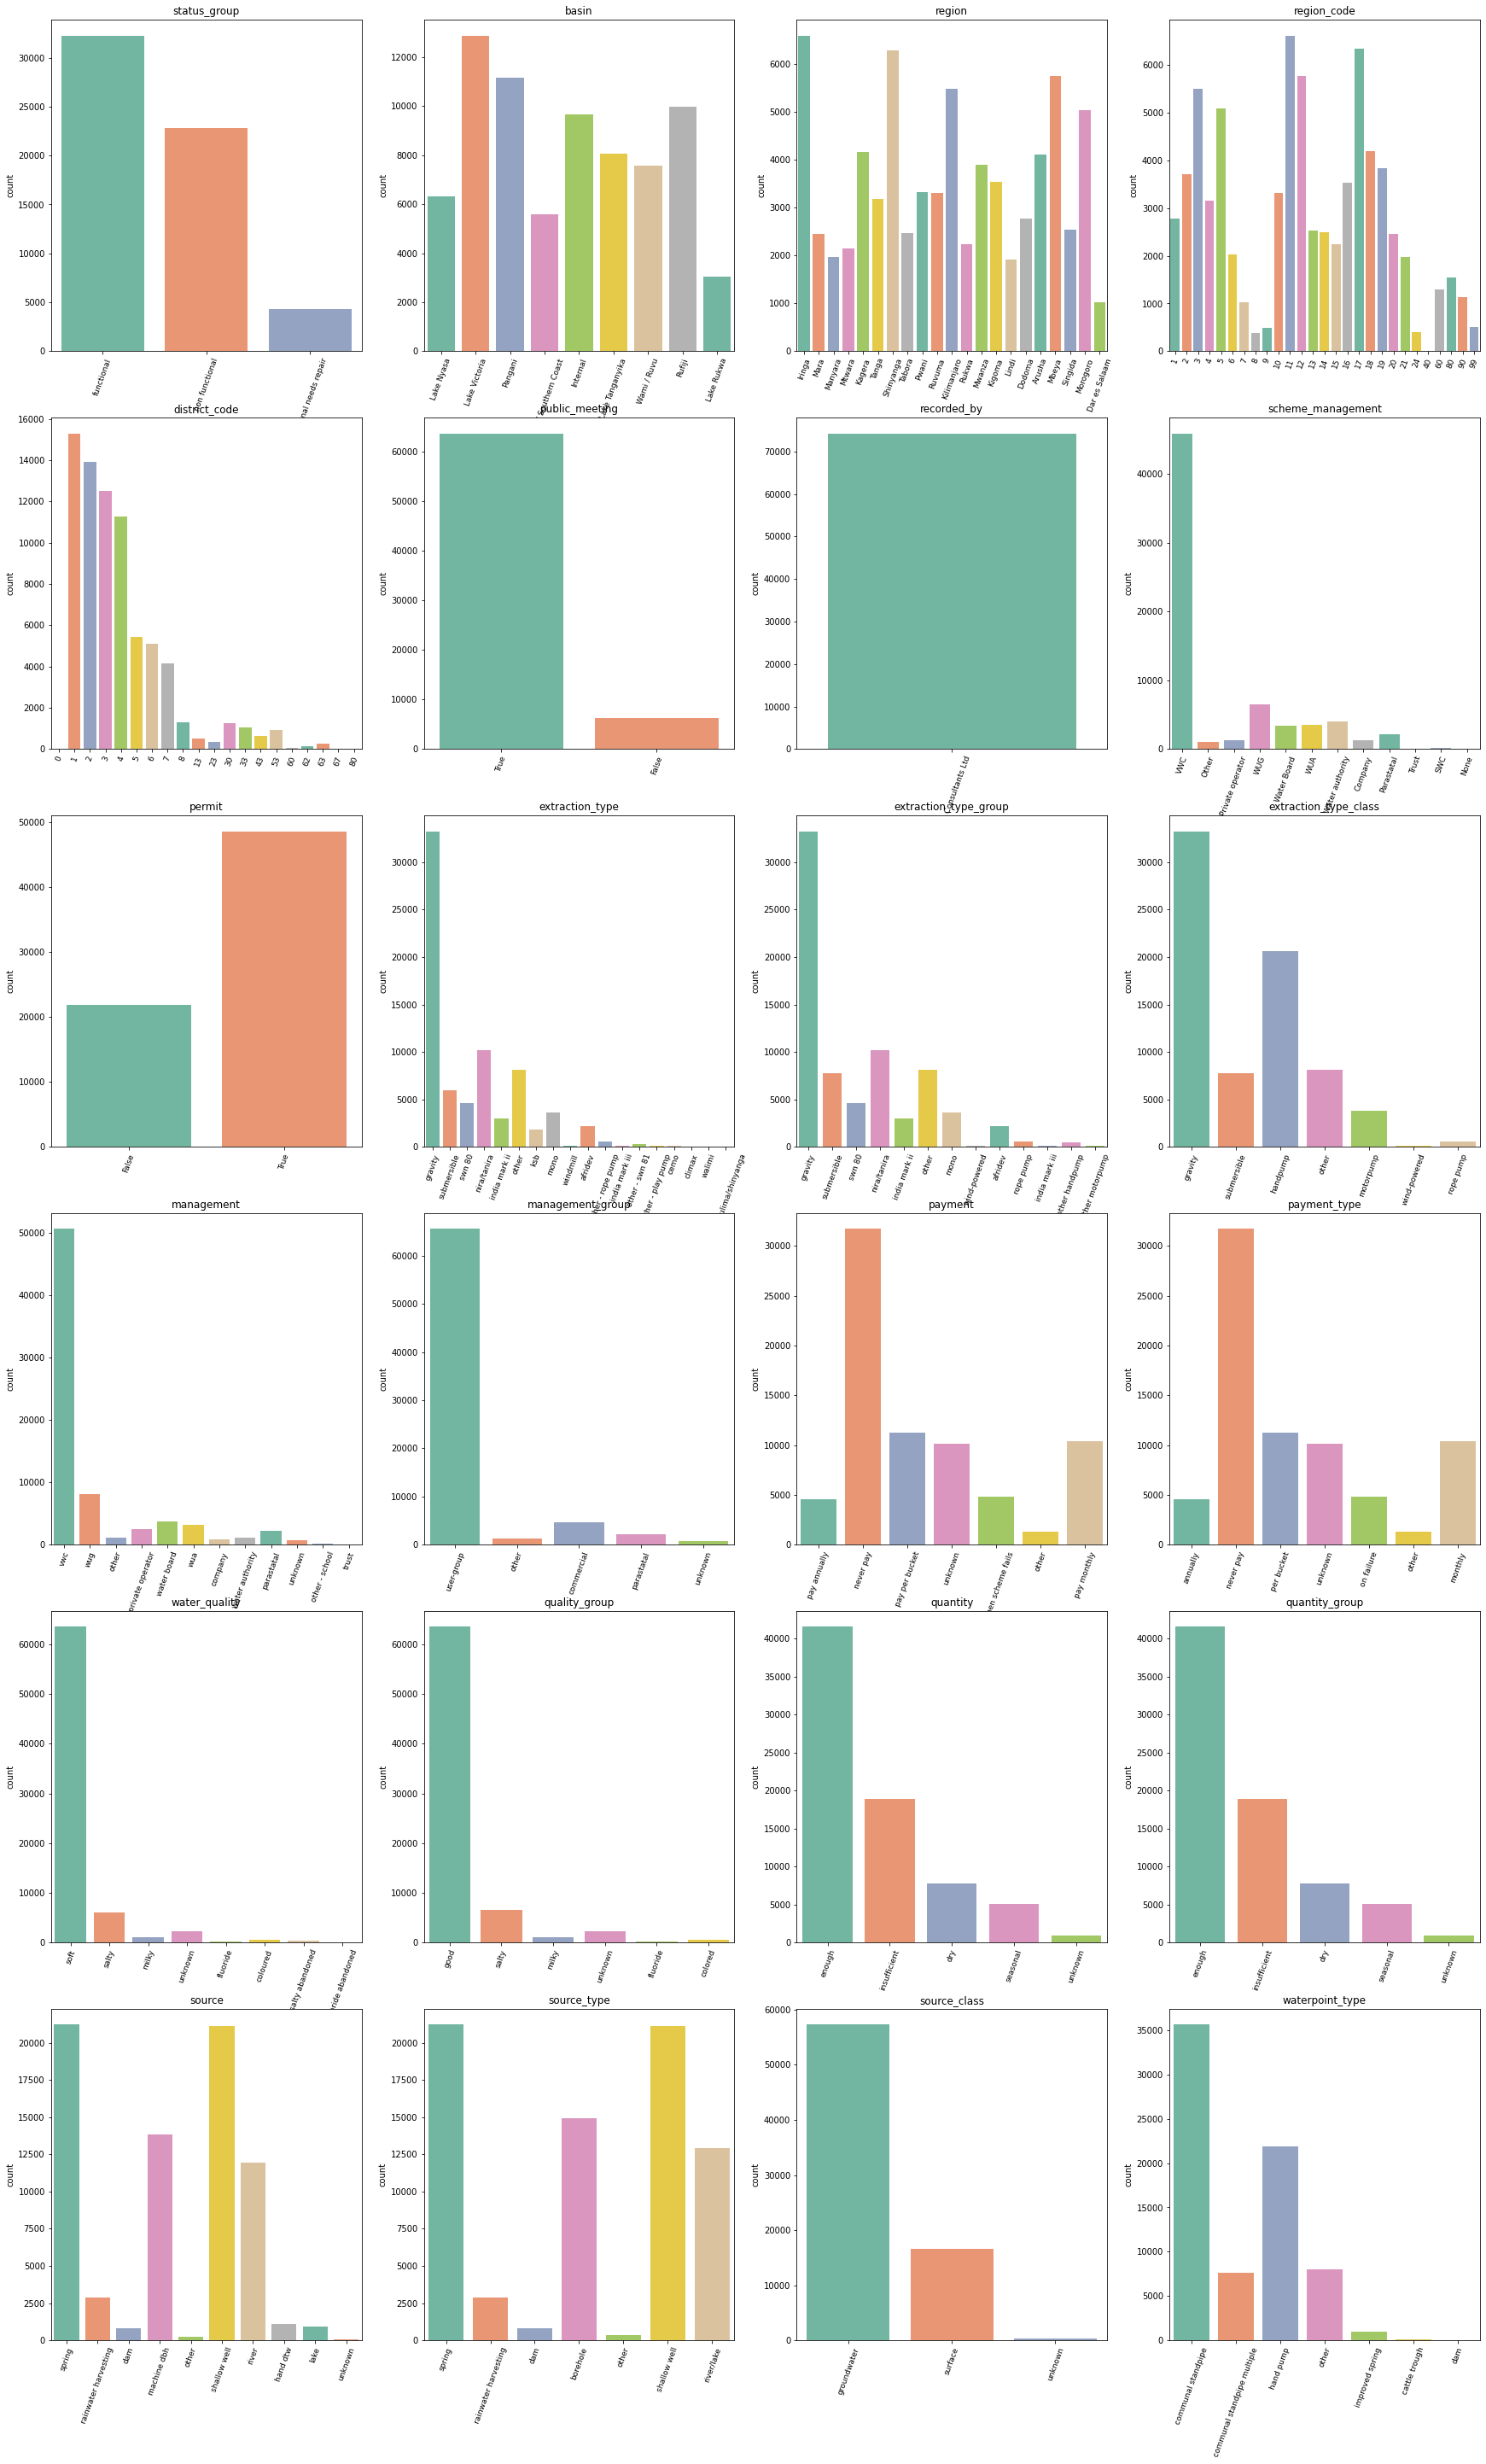

In [208]:
#create a list of categorical features with low cardinality
dq_report_cat = categorical_dqr(raw)
low_cardinal = dq_report_cat[dq_report_cat['Unique Values'] <=50]
cardinal_index = low_cardinal.index
low_cardinal_list = cardinal_index.to_list()

#create countplots
try:
    countplotter (raw, raw[low_cardinal_list].columns, 6,4)
except IndexError: 
    pass 

# 3 EDA - features

#### **Amount tsh**

In [172]:
numerical_dqr.loc[['amount_tsh']]

,Data Type,Records,Unique Values,Missing Values,Missing %,Mean Value,Minimum Value,1st Quartile,Median,3rd Quartile,Maximum Value
amount_tsh,float64,74250,102,0,0.0,318.7,0.0,0.0,0.0,20.0,350000.0


In [180]:
#amount_tsh has 102 unique values, but 70% of them consist of zero's. These could very well be missing values.
tsh = raw['amount_tsh'].value_counts(normalize=True)
tsh.head(3)

0.0      0.700997
500.0    0.052175
50.0     0.041791
Name: amount_tsh, dtype: float64

In [202]:
#perhabs there is value hidden in the 'missigness' of amount_tsh, let's check this.
temp = train.copy()
temp['amount_tsh_missing'] = np.where( temp['amount_tsh']==0.0, 1, 0) # if amount_tsh =0, then 1, otherwise 0

#visualize the distribution of the y-variable 'status_group' 
distribution_checker(temp, 'amount_tsh_missing')

,,total_pumps,perc_functional,perc_non_functional,perc_functional_needs_repair
0,0,17761,70.7,22.2,7.1
1,1,41639,47.3,45.4,7.3


Assuming that missing values are encoded as zero, we can see that there is some information hidden in a feature that captures its missingness. Pumps where *amount_tsh* is unavailable are less often functional and more often non-functional.

### **Date recorded**

In [186]:
datetime_dqr(raw)

,Data Type,Records,Unique Values,Missing Values,Missing %,Mean Value,Minimum Value,1st Quartile,Median,3rd Quartile,Maximum Value
date_recorded,datetime64[ns],74250,369,0,0.0,2012-03-28,2001-03-26,2011-04-01,2012-10-10,2013-02-09,2013-12-03


The status of the pumps was recorded between 2001 and 2013. Nothing stands out to me when looking at the data quality report. This feature could be usefull when calculating the age of the well at the time of recording.

**Recorded year**

In [203]:
#create 'recorded_year' feature
temp = train.copy()
temp['recorded_year'] = pd.DatetimeIndex(temp ['date_recorded']).year

#check the distribution of 'status_group' for the 'recorded_year' feature
recorded = distribution_checker(temp ,'recorded_year')
recorded

,,total_pumps,perc_functional,perc_non_functional,perc_functional_needs_repair
0,2002,1,100.0,0.0,0.0
1,2004,30,33.3,63.3,3.3
2,2011,28674,56.6,37.1,6.3
3,2012,6424,48.7,45.7,5.6
4,2013,24271,53.2,38.0,8.8


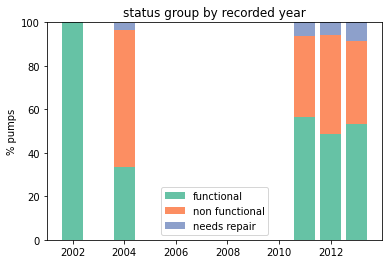

In [212]:
#plot status group by recorded year
fig, ax = plt.subplots()
labels = temp['recorded_year'].sort_values().unique()
ax.bar(labels, recorded['perc_functional'], label = 'functional' ,  color = '#66c2a5')
ax.bar (labels, recorded['perc_non_functional'], label = 'non functional', bottom = recorded['perc_functional'] , color = '#fc8e62')
ax.bar(labels, recorded['perc_functional_needs_repair'], label = 'needs repair', bottom = recorded['perc_functional'] + recorded['perc_non_functional'], color = '#8da0cb')
ax.set_title('status group by recorded year')
ax.set_ylabel('% pumps')
plt.legend()
plt.show()

The fast majority of the recordings date from 2011 and 2013. There appears to be no effect of year of recording on the status of the pumps.

**Recorded month**

In [216]:
#create 'recorded_year' feature
temp = train.copy()
temp['recorded_month'] = pd.DatetimeIndex(temp ['date_recorded']).month

#check the distribution of 'status_group' for the 'recorded_month' feature
recorded = distribution_checker(temp ,'recorded_month')
recorded

,,total_pumps,perc_functional,perc_non_functional,perc_functional_needs_repair
0,1,6354,41.1,46.2,12.7
1,2,12402,55.2,37.3,7.5
2,3,17936,61.7,33.3,5.0
3,4,3970,51.6,37.3,11.0
4,5,336,60.1,36.9,3.0
5,6,346,78.0,19.4,2.6
6,7,6928,50.2,41.9,7.9
7,8,3364,51.1,41.4,7.5
8,9,328,65.2,31.7,3.0
9,10,5466,50.9,43.3,5.8


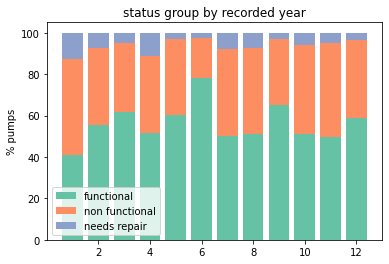

In [215]:
#plot status group by 'recorded_month'
fig, ax = plt.subplots()
labels = temp['recorded_month'].sort_values().unique()
ax.bar(labels, recorded['perc_functional'], label = 'functional' ,  color = '#66c2a5')
ax.bar (labels, recorded['perc_non_functional'], label = 'non functional', bottom = recorded['perc_functional'] , color = '#fc8e62')
ax.bar(labels, recorded['perc_functional_needs_repair'], label = 'needs repair', bottom = recorded['perc_functional'] + recorded['perc_non_functional'], color = '#8da0cb')
ax.set_title('status group by recorded year')
ax.set_ylabel('% pumps')
plt.legend()
plt.show()

The status of most pumps is recorded in February and March and far less often in May and June. This is interessting because January and February are part of the short dry season whilst  the long rainy season lasts from March to late May. It might be easier to check the status of pumps whilst the weather is good. 

There appears to be a difference in the percentage of functional pumps over the different months, but this effect might be biased by a lower number of records during these months. 

### **Installer**

In [220]:
categorical_dqr.loc[['funder']]

,Data Type,Records,Unique Values,Missing Values,Missing %,Mode,Mode freq.,Mode %
funder,object,69746,2140,4504,6.1,Government Of Tanzania,11299,16.2


In [222]:
#check the distribution of status groups for the 10 most frequent funders
funder = distribution_checker(raw, 'funder')
funder = funder.sort_values('total_pumps', ascending= False)
funder.head(10)

,,total_pumps,perc_functional,perc_non_functional,perc_functional_needs_repair
456,Government Of Tanzania,9084,41.0,51.3,7.7
261,Danida,3114,55.0,39.9,5.1
513,Hesawa,2202,42.5,47.0,10.5
1416,Rwssp,1374,58.6,33.5,7.9
1865,World Bank,1349,40.4,52.4,7.2
727,Kkkt,1287,56.2,38.7,5.1
1867,World Vision,1246,59.6,29.9,10.5
1741,Unicef,1057,56.8,33.9,9.4
1633,Tasaf,877,56.2,36.5,7.3
302,District Council,843,44.8,49.8,5.3


In [ ]:
https://adb-7670641235086533.13.azuredatabricks.net/?o=7670641235086533#notebook/3502774562948572/command/3502774562948605
https://adb-7670641235086533.13.azuredatabricks.net/?o=7670641235086533#notebook/1263564952756304/command/2552995492087043
https://adb-7670641235086533.13.azuredatabricks.net/?o=7670641235086533#notebook/3965069572358914/command/3965069572358959

In [217]:
raw.head()

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,functional,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,functional,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,functional,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,non functional,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,functional,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
